<a href="https://colab.research.google.com/github/Rangulov/PhMathInfo/blob/main/Homework_3(%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn import datasets
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from collections import Counter

# Метрики оценки регрессии

In [11]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # R^2
    r2 = model.score(X_test, y_test)
    # Количество наблюдений
    n = X_test.shape[0]
    # Число признаков
    p = X_test.shape[1]
    # Скорректированный
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

# Генерируем датасет

Сгенерируем датасет с 2 признаками и 1-ой целевой переменной.

In [23]:
X, y = make_regression(n_samples=1000, n_features=2, noise=0.2, random_state=42)

df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Target'] = y

feature_names = ['Feature_1', 'Feature_2']

print(df.head())

   Feature_1  Feature_2     Target
0  -0.167118   0.146714  -6.018269
1  -0.020902   0.117327  -0.328474
2   0.150419   0.364961   8.717607
3   0.555604   0.089581  22.879362
4   0.058209  -1.142970  -5.355425


# Анализ данных

Размер датасета, 1000 записей, 3 столбца

In [3]:
df.shape

(1000, 3)

Отображаем первые 10 строк датасета

In [6]:
df.head(10)

,Feature_1,Feature_2,Target
0,-0.167118,0.146714,-6.018269
1,-0.020902,0.117327,-0.328474
2,0.150419,0.364961,8.717607
3,0.555604,0.089581,22.879362
4,0.058209,-1.142970,-5.355425
5,-0.966976,-0.047711,-39.392442
6,-1.001620,-0.281100,-42.564129
7,-1.669405,0.543360,-64.128704
8,0.119580,-0.973069,-1.408644
9,-1.406317,-0.083106,-57.647034


Выведем информацию о датасете

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Target     1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [9]:
df.describe()

,Feature_1,Feature_2,Target
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.727945
std,0.961603,1.014959,39.741690
min,-3.241267,-2.940389,-138.597701
25%,-0.611581,-0.651418,-23.861763
50%,0.036043,0.047742,0.909227
75%,0.648317,0.714886,27.977770
max,3.078881,3.852731,132.850415


## Диаграмма рассеяния

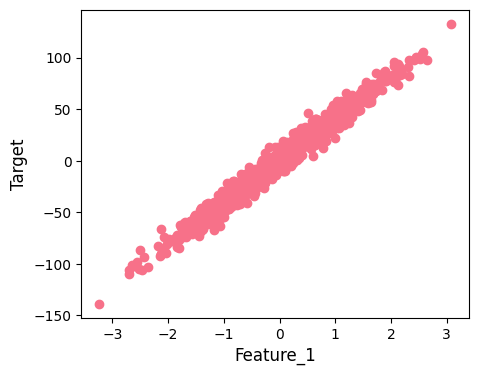

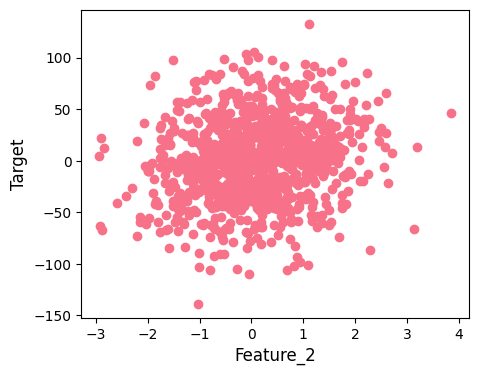

In [25]:
for index, feature_name in enumerate(feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, index], y)
    plt.ylabel('Target', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

# Готовим датасет к обучению

In [26]:
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1000, 2) | y shape: (1000,) 


Делим датасет на трейн и тест (80 на 20)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

# Линейная регрессия

In [29]:
# Создаем линейную регрессию
modelLR = LinearRegression()

# Обучаем модель на обучаемой выборке
modelLR.fit(X_train, y_train)

# Предсказываем целевую переменную для тестовой выборки
y_pr_LR = modelLR.predict(X_test)

Посмотрим метрики по нашей функции

In [30]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  0.1857
  R2: 1.0
 Adjusted R2: 1.0
 Cross Validated R2: 1.0


Отрисуем как выглядит наша линейная регрессия

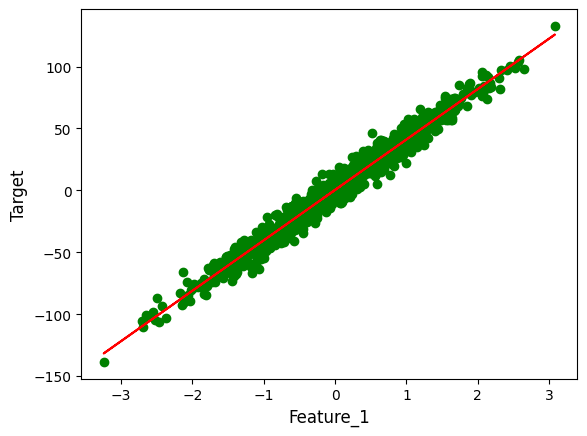

In [44]:
X2 = df['Feature_1'].values[:,np.newaxis]
y2 = df['Target'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='r')
plt.ylabel('Target', size=12)
plt.xlabel('Feature_1', size=12)
plt.show()


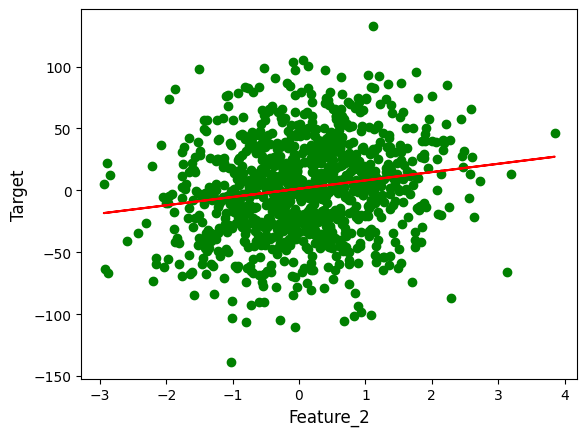

In [45]:
X2 = df['Feature_2'].values[:,np.newaxis]
y2 = df['Target'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='r')
plt.ylabel('Target', size=12)
plt.xlabel('Feature_2', size=12)
plt.show()

# Регрессия дерева принятия решений

In [34]:
from sklearn.tree import DecisionTreeRegressor

# Создаем регрессию дерева принятия решений
modelDT = DecisionTreeRegressor()

# Обучаем модель
modelDT.fit(X_train, y_train)

# Предсказываем значения
y_dt_pred = modelDT.predict(X_test)

In [35]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  3.1148
  R2: 0.9931
 Adjusted R2: 0.9931
 Cross Validated R2: 0.9934


# Регрессия случайного леса

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Создаем регрессионную модель со 100 деревьями
modelRF = RandomForestRegressor(n_estimators=100)

# Обучаем модель
modelRF.fit(X_train, y_train)

# Предсказываем значения
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  2.7585
  R2: 0.9946
 Adjusted R2: 0.9946
 Cross Validated R2: 0.9959


#Регрессия опорных векторов (SVR)

## Линейное ядро

In [71]:
from sklearn.svm import SVR

# Создаем регрессионную модель в этом случае линейное ядро
modelSVR = SVR(kernel='linear')

# Обучаем модель
modelSVR.fit(X_train, y_train)

# Предсказываем значения
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.1871
  R2: 1.0
 Adjusted R2: 1.0
 Cross Validated R2: 1.0


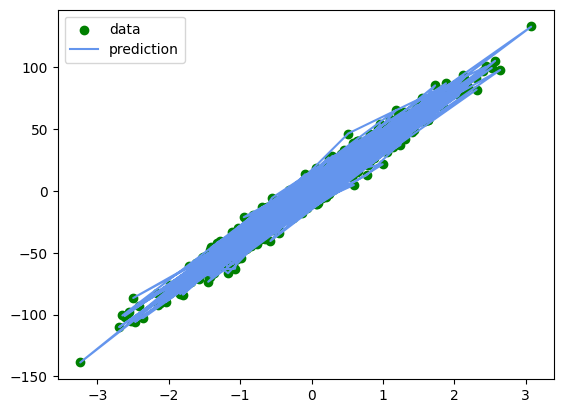

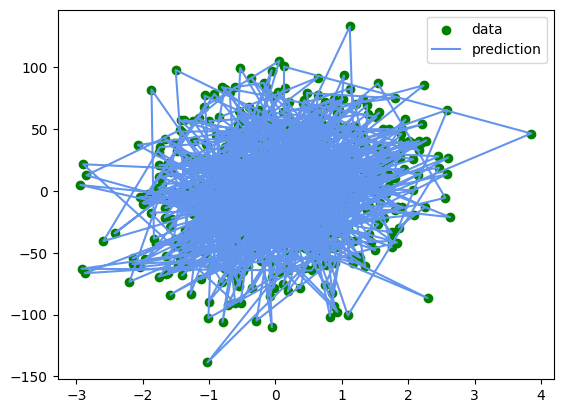

In [72]:
plt.scatter(X_train[:,0], y_train, color='g',
            label='data')
plt.plot(X_train[:,0], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()
plt.scatter(X_train[:,1], y_train, color='g',
            label='data')
plt.plot(X_train[:,1], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

## Полиномиальное ядро

In [73]:
from sklearn.svm import SVR

# Создаем регрессионную модель в этом случае полиномиальное ядро
modelSVR = SVR(kernel='poly')

# Обучаем модель
modelSVR.fit(X_train, y_train)

# Предсказываем значения
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  22.5055
  R2: 0.6412
 Adjusted R2: 0.6376
 Cross Validated R2: 0.6382


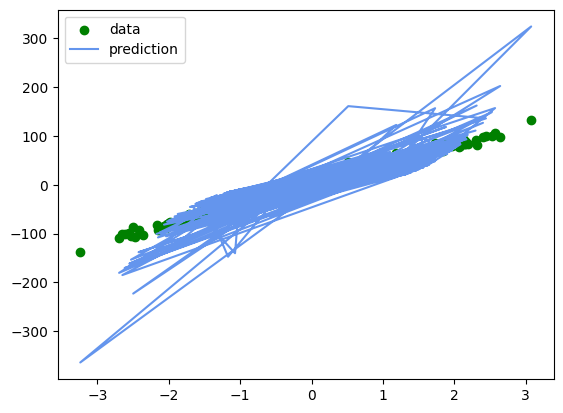

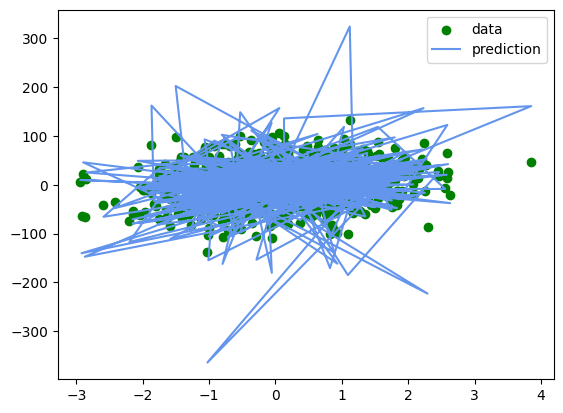

In [74]:
plt.scatter(X_train[:,0], y_train, color='g',
            label='data')
plt.plot(X_train[:,0], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()
plt.scatter(X_train[:,1], y_train, color='g',
            label='data')
plt.plot(X_train[:,1], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

## Ядро - радиальная базисная функция

In [75]:
# Создаем регрессионную модель в этом случае радиальное базисное ядро
modelSVR = SVR(kernel='rbf')

# Обучаем модель
modelSVR.fit(X_train, y_train)

# Предсказываем значения
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  13.4655
  R2: 0.8716
 Adjusted R2: 0.8703
 Cross Validated R2: 0.8645


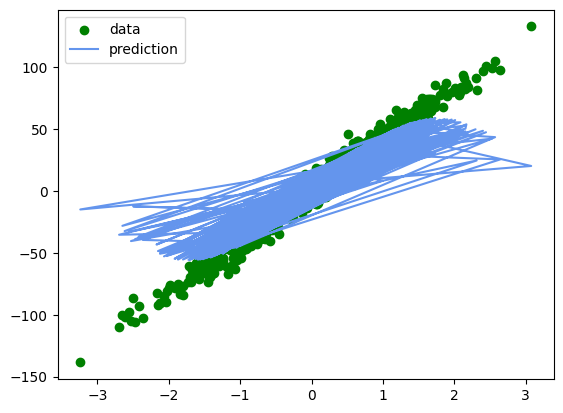

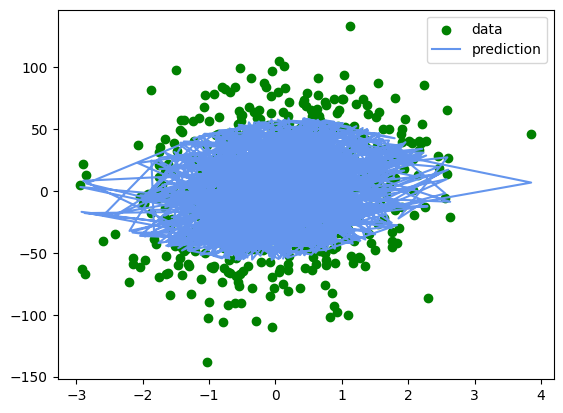

In [76]:
plt.scatter(X_train[:,0], y_train, color='g',
            label='data')
plt.plot(X_train[:,0], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()
plt.scatter(X_train[:,1], y_train, color='g',
            label='data')
plt.plot(X_train[:,1], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

#Регрессия ElasticNet

In [77]:
from sklearn.linear_model import ElasticNet

# Создаем регрессионную модель
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Обучаем модель
modelEN.fit(X_train, y_train)

# Предсказываем значения
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  0.8903
  R2: 0.9994
 Adjusted R2: 0.9994
 Cross Validated R2: 0.9994


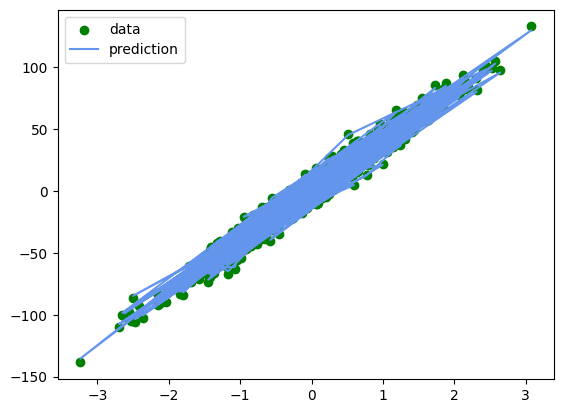

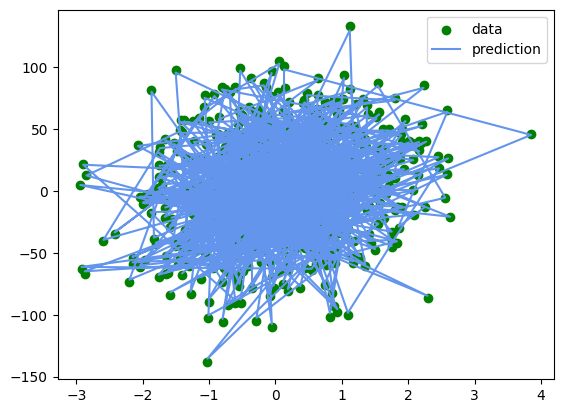

In [78]:
plt.scatter(X_train[:,0], y_train, color='g',
            label='data')
plt.plot(X_train[:,0], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()
plt.scatter(X_train[:,1], y_train, color='g',
            label='data')
plt.plot(X_train[:,1], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()